In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from L_Layer_model import *
import scipy
from PIL import Image
from scipy import ndimage
from utils import *


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
train_x_orig, train_y, test_x_orig, test_y = load_image()

In [3]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))


Number of training examples: 13
Number of testing examples: 24
Each image is of size: (64, 64, 3)
train_x_orig shape: (13, 64, 64, 3)
train_y shape: (1, 13)
test_x_orig shape: (24, 64, 64, 3)
test_y shape: (1, 24)


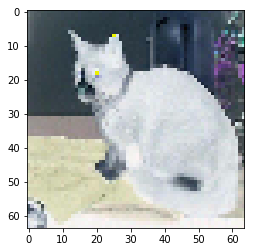

In [6]:
# see a picture example
plt.imshow(train_x_orig[1])

In [7]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 13)
test_x's shape: (12288, 24)


# 5 Layer Neural Network

In [8]:
## mention how many layer network you want here by adding layer dimensions in layer_dims :)

layers_dims = [12288, 20, 7, 5, 1]

In [9]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = init_parameters_L(layers_dims)
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

# Training 

Cost after iteration 0: 0.693146
Cost after iteration 100: 0.692220
Cost after iteration 200: 0.691584
Cost after iteration 300: 0.691147
Cost after iteration 400: 0.690846
Cost after iteration 500: 0.690640
Cost after iteration 600: 0.690498
Cost after iteration 700: 0.690400
Cost after iteration 800: 0.690333
Cost after iteration 900: 0.690287
Cost after iteration 1000: 0.690255
Cost after iteration 1100: 0.690233
Cost after iteration 1200: 0.690218
Cost after iteration 1300: 0.690208
Cost after iteration 1400: 0.690201
Cost after iteration 1500: 0.690196
Cost after iteration 1600: 0.690192
Cost after iteration 1700: 0.690190
Cost after iteration 1800: 0.690188
Cost after iteration 1900: 0.690187
Cost after iteration 2000: 0.690187
Cost after iteration 2100: 0.690186
Cost after iteration 2200: 0.690186
Cost after iteration 2300: 0.690185
Cost after iteration 2400: 0.690185


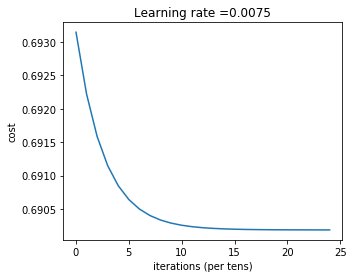

In [10]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

# Evaluation 

In [11]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.538461538462


In [12]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.5
